# TAXI FARE PREDICTION

In [1]:
import numpy as np 
import pandas as pd 

### IMPORT OF LIBRARIES AND DATASETS 

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

In [3]:
df = pd.read_csv("TaxiFare.csv")

### DATA UNDERSTANDING

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


### DATA CLEANING AND MISSING VALUE ANALYSIS

In [8]:
df["amount"] = pd.to_numeric(df["amount"],errors = "coerce")

In [9]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [10]:
df.shape

(50000, 8)

In [11]:
df.dropna(subset=["date_time_of_pickup"])

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [12]:
df['date_time_of_pickup'] =  pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [13]:
df['Year'] = df['date_time_of_pickup'].dt.year
df['Month'] = df['date_time_of_pickup'].dt.month
df['Date'] = df['date_time_of_pickup'].dt.day
df['Day'] = df['date_time_of_pickup'].dt.dayofweek
df['Hour'] = df['date_time_of_pickup'].dt.hour
df['Minute'] = df['date_time_of_pickup'].dt.minute

In [14]:
df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
Year                             int32
Month                            int32
Date                             int32
Day                              int32
Hour                             int32
Minute                           int32
dtype: object

In [15]:
df = df.drop(df[df['date_time_of_pickup'].isnull()].index, axis=0)
print(df.shape)
print(df['date_time_of_pickup'].isnull().sum())

(50000, 14)
0


In [16]:
df['no_of_passenger'].describe()

count    50000.000000
mean         1.667840
std          1.289195
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [17]:
df = df.drop(df[df["no_of_passenger"]> 6 ].index, axis=0)

In [18]:
df = df.drop(df[df["no_of_passenger"] == 0 ].index, axis=0)

In [19]:
df["no_of_passenger"].describe()

count    49835.000000
mean         1.673362
std          1.287744
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [20]:
df["no_of_passenger"].sort_values(ascending=True)

0        1
30430    1
30432    1
30433    1
30436    1
        ..
38711    6
49055    6
4691     6
26059    6
30238    6
Name: no_of_passenger, Length: 49835, dtype: int64

In [21]:
df = df.drop(df[df['no_of_passenger'].isnull()].index, axis=0)
print(df.shape)
print(df['no_of_passenger'].isnull().sum())

(49835, 14)
0


In [22]:
df = df.drop(df[df['no_of_passenger']==0.12].index, axis=0)

In [23]:
df.shape

(49835, 14)

In [24]:
df["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
43956    165.0
1483     165.0
46198    160.0
         ...  
36722     -2.5
28839     -2.5
2039      -2.9
13032     -3.0
42337     -5.0
Name: amount, Length: 49835, dtype: float64

In [25]:
Counter(df["amount"]<0)

Counter({False: 49829, True: 6})

In [26]:
df = df.drop(df[df['amount']<0].index, axis=0)
print(df.shape)

(49829, 14)


In [27]:
df["amount"].min()

0.0

In [28]:
df = df.drop(df[df['amount']<1].index,axis=0)
df.shape

(49825, 14)

In [29]:
df['amount'].sort_values(ascending=False)

28373    200.0
1335     180.0
1483     165.0
43956    165.0
46198    160.0
         ...  
34445      2.5
28444      2.5
8711       2.5
49292      2.5
17862      2.5
Name: amount, Length: 49825, dtype: float64

In [30]:
df = df.drop(df[df["amount"].isnull()].index, axis=0)
df.shape

(49825, 14)

In [31]:
df = df.drop(df[df["amount"]>453].index, axis=0)
df.shape

(49825, 14)

In [32]:
df['amount'].sort_values(ascending=False)

28373    200.0
1335     180.0
1483     165.0
43956    165.0
46198    160.0
         ...  
34445      2.5
28444      2.5
8711       2.5
49292      2.5
17862      2.5
Name: amount, Length: 49825, dtype: float64

In [33]:
df['amount'].describe()

count    49825.000000
mean        11.373278
std          9.693535
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [34]:
df[df['latitude_of_pickup']<-90]
df[df['latitude_of_pickup']>90]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Date,Day,Hour,Minute
5686,15:00.0,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,7,30,5,11,15


In [35]:
df = df.drop((df[df['latitude_of_pickup']<-90]).index, axis=0)
df = df.drop((df[df['latitude_of_pickup']>90]).index, axis=0)

In [36]:
df['latitude_of_pickup'].sort_values(ascending=False)

28274    43.098708
35211    42.160275
43305    41.650000
42869    41.523217
28373    41.391042
           ...    
9548    -73.992947
41872   -73.995000
31847   -74.004027
10091   -74.006210
8443    -74.006893
Name: latitude_of_pickup, Length: 49824, dtype: float64

In [37]:
df[df['longitude_of_pickup']<-180]
df[df['longitude_of_pickup']>180]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Date,Day,Hour,Minute


In [38]:
df.shape

(49824, 14)

In [39]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Year                    0
Month                   0
Date                    0
Day                     0
Hour                    0
Minute                  0
dtype: int64

In [40]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    km = 6371* c
    return km

In [41]:
df['distance'] = df[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)

In [42]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Date,Day,Hour,Minute,distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [43]:
df.nunique()

unique_id                3597
amount                    697
date_time_of_pickup     49380
longitude_of_pickup     33652
latitude_of_pickup      36515
longitude_of_dropoff    34808
latitude_of_dropoff     37336
no_of_passenger             6
Year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance                48379
dtype: int64

In [44]:
df['distance'].sort_values(ascending=False)

48996    8667.818812
31823    8667.572331
9147     8667.542104
37798    8667.534293
8647     8667.497512
            ...     
16945       0.000000
45983       0.000000
45985       0.000000
16926       0.000000
49999       0.000000
Name: distance, Length: 49824, dtype: float64

In [45]:
Counter(df['distance'] == 0)

Counter({False: 48378, True: 1446})

In [46]:
df = df.drop(df[df['distance']== 0].index, axis=0)
df.shape

(48378, 15)

In [47]:
df = df.drop(df[df['distance']> 130 ].index, axis=0)
df.shape

(48288, 15)

In [48]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Date,Day,Hour,Minute,distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [49]:
drop1 = ['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff', 'Minute']
df = df.drop(drop1, axis = 1)

In [50]:
df.head()

,unique_id,amount,no_of_passenger,Year,Month,Date,Day,Hour,distance
0,26:21.0,4.5,1,2009,6,15,0,17,1.030764
1,52:16.0,16.9,1,2010,1,5,1,16,8.450134
2,35:00.0,5.7,2,2011,8,18,3,0,1.389525
3,30:42.0,7.7,1,2012,4,21,5,4,2.799270
4,51:00.0,5.3,1,2010,3,9,1,7,1.999157


In [51]:
df['no_of_passenger'] = df['no_of_passenger'].astype('int64')
df['Year'] = df['Year'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['Date'] = df['Date'].astype('int64')
df['Day'] = df['Day'].astype('int64')
df['Hour'] = df['Hour'].astype('int64')

In [52]:
df.dtypes

unique_id           object
amount             float64
no_of_passenger      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

### DATA VISUALIZATION 

<Axes: xlabel='no_of_passenger', ylabel='count'>

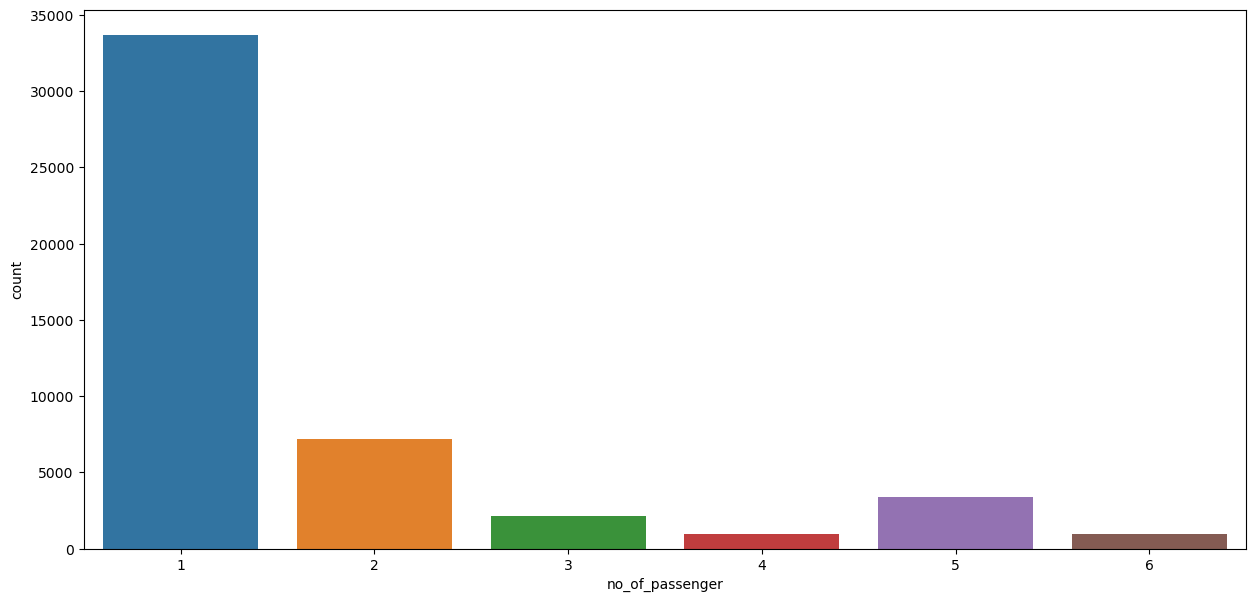

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x="no_of_passenger", data=df)

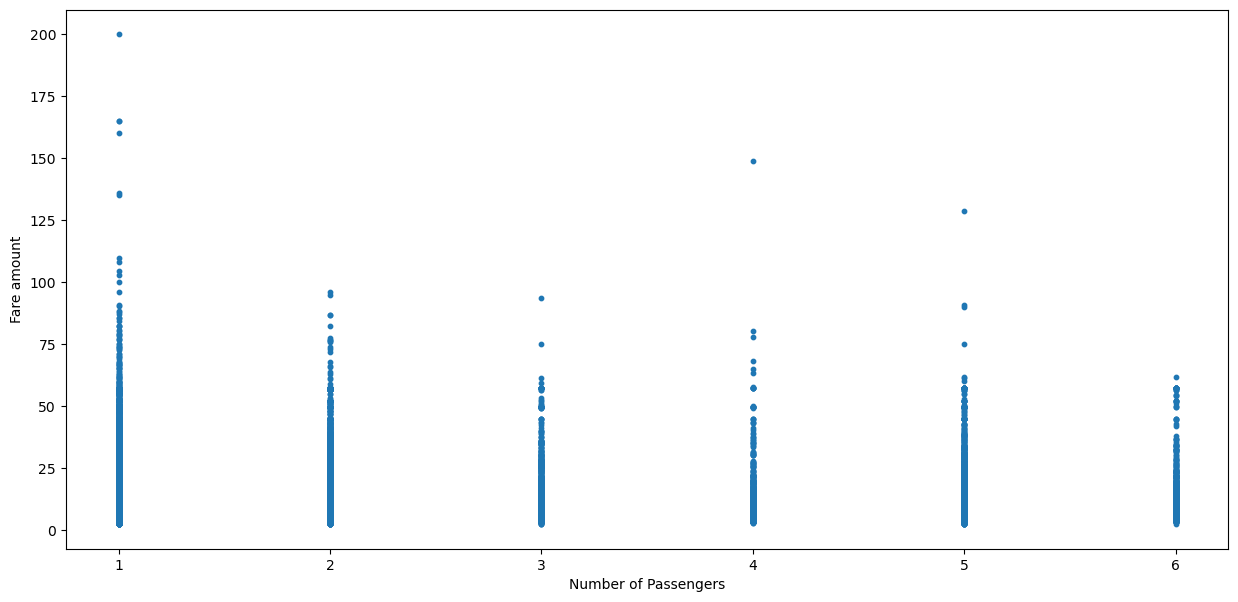

In [54]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['no_of_passenger'], y=df['amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

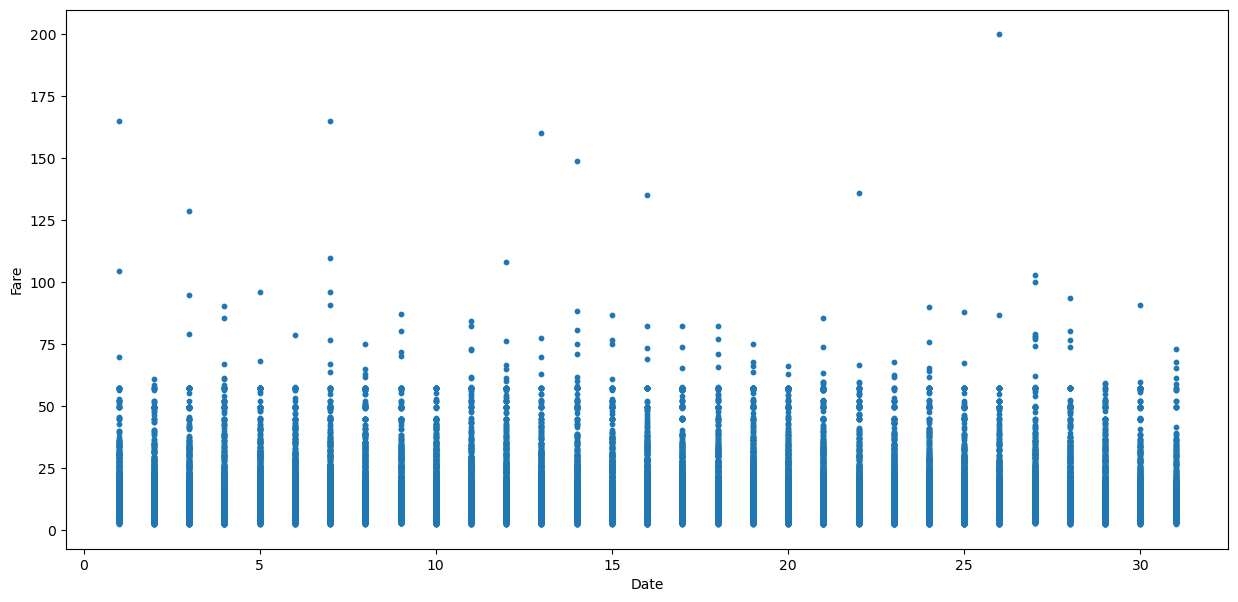

In [55]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Date'], y=df['amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

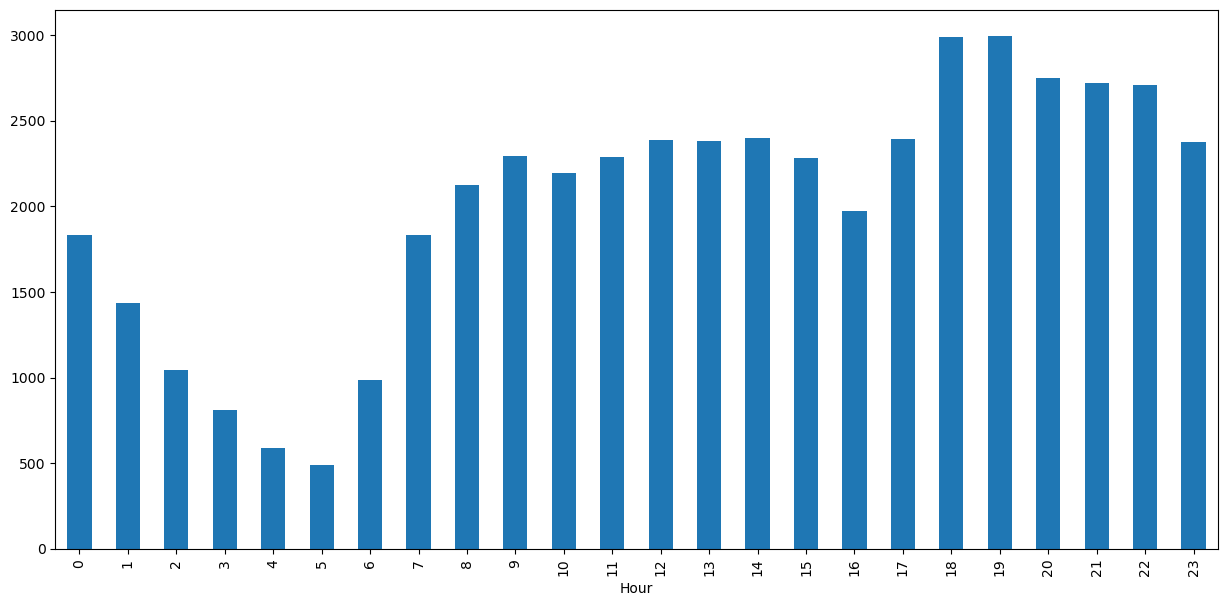

In [56]:
plt.figure(figsize=(15,7))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

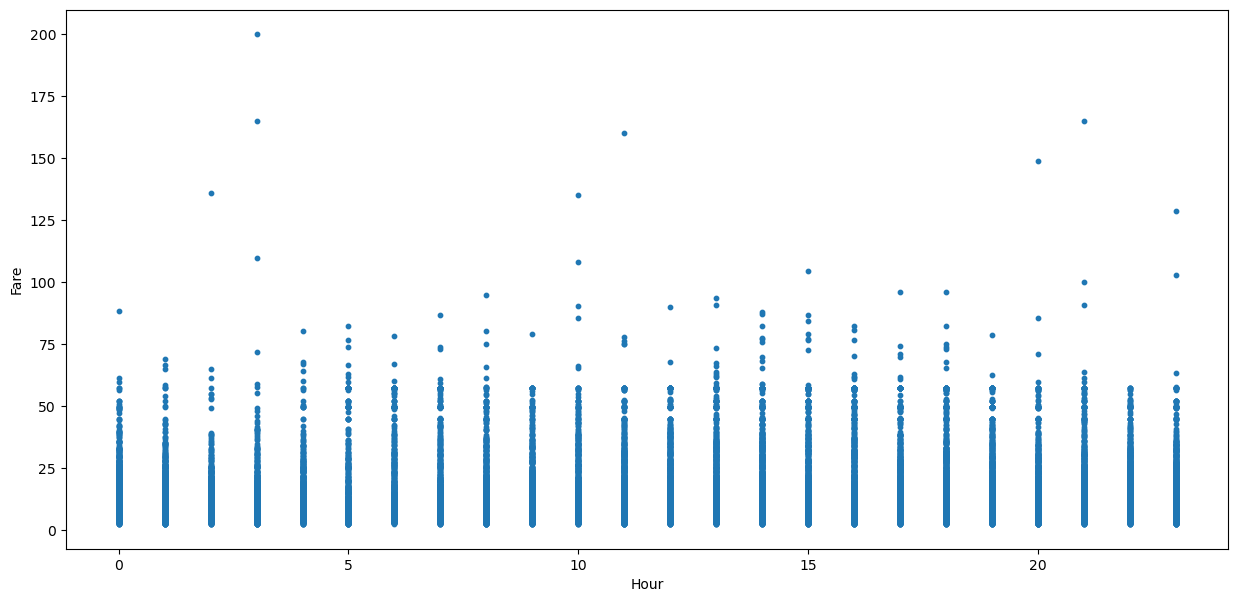

In [57]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Day', ylabel='count'>

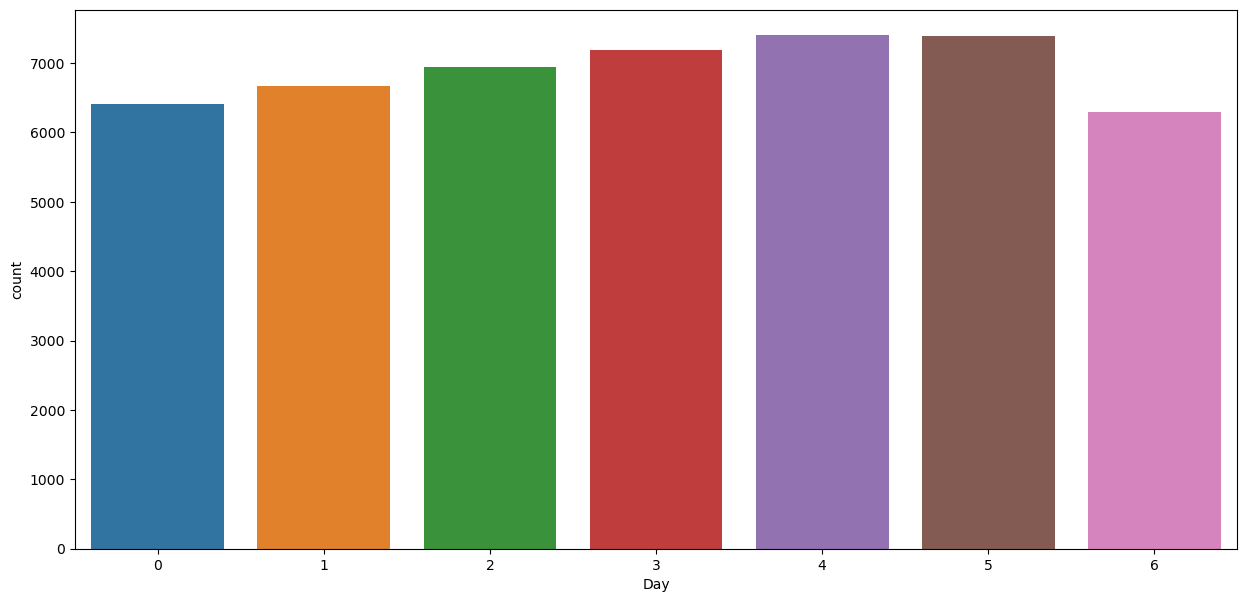

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=df)

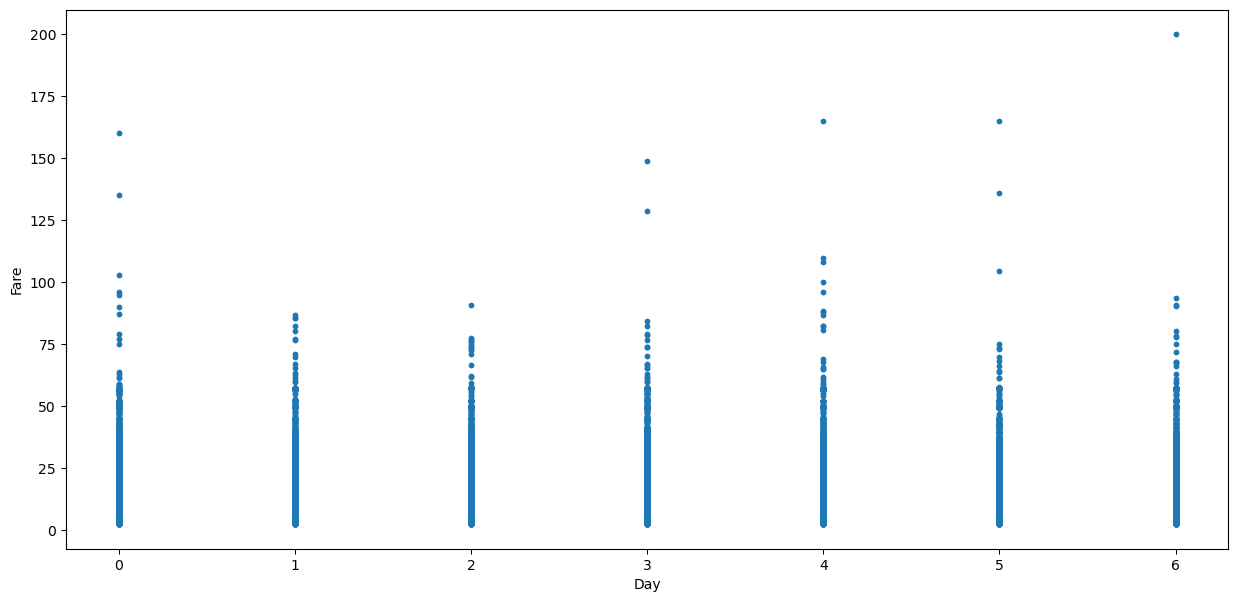

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Day'], y=df['amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

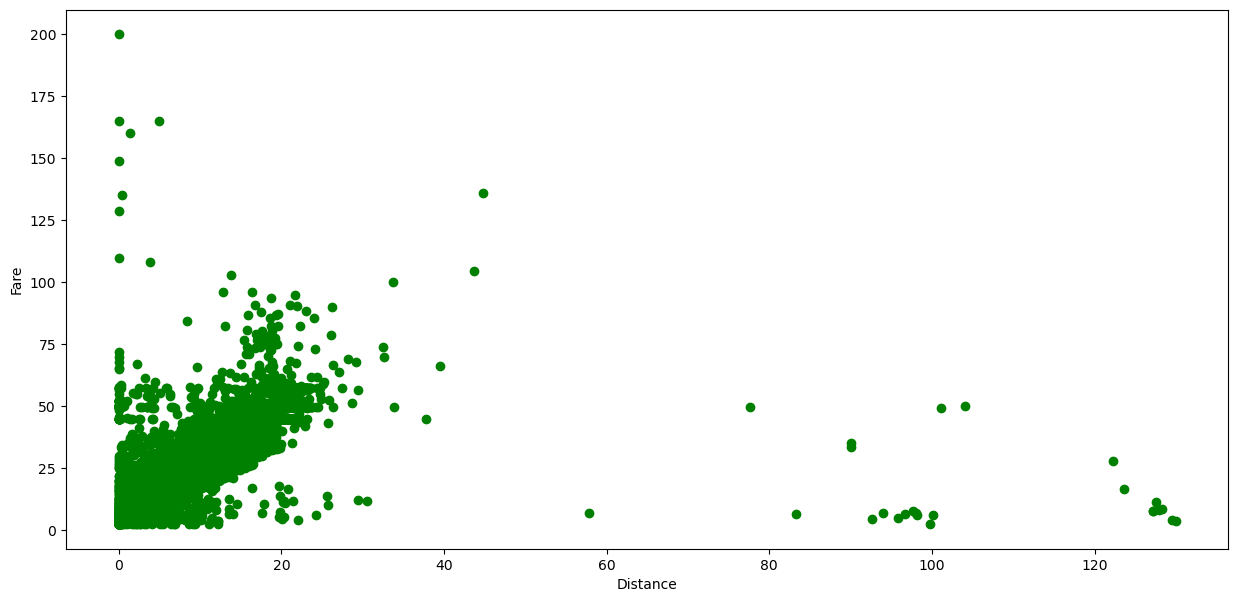

In [60]:
plt.figure(figsize=(15,7))
plt.scatter(x = df['distance'],y = df['amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

### FEATURE SCALING

amount


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14664\3442057459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins='auto',color='green')


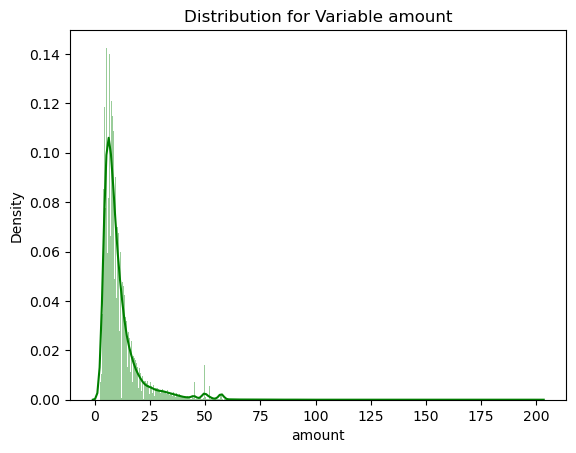

distance


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14664\3442057459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins='auto',color='green')


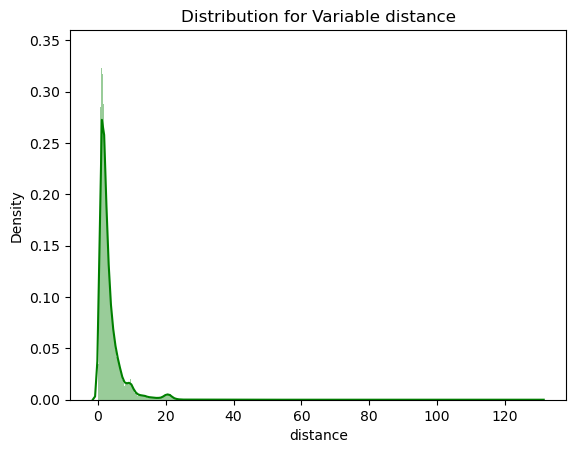

In [61]:
for i in ['amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [62]:
df['amount'] = np.log1p(df['amount'])

In [63]:
df['distance'] = np.log1p(df['distance'])

amount


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14664\3442057459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins='auto',color='green')


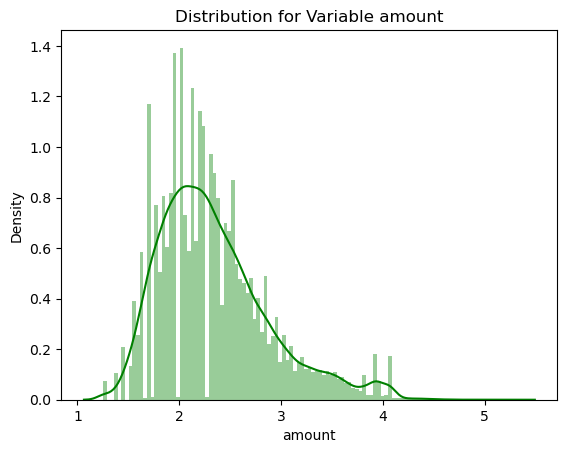

distance


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14664\3442057459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins='auto',color='green')


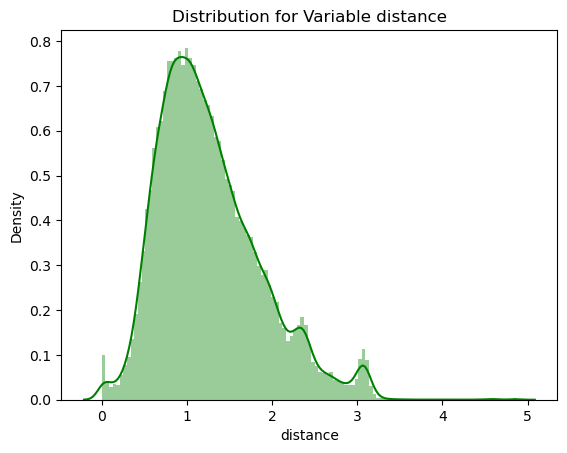

In [64]:
for i in ['amount', 'distance']:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [65]:
test1= df.copy()

In [66]:
df.drop(['unique_id'],axis=1,inplace=True)

In [67]:
df.head()

,amount,no_of_passenger,Year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


## APPLYING ML MODEL

In [70]:
from sklearn.model_selection import train_test_split
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

In [69]:
df_train, df_test, df1_train, df1_test = train_test_split( df.iloc[:, df.columns != 'amount'], 
                         df.iloc[:, 0], test_size = 0.20, random_state = 1)

print(df_train.shape, df_test.shape)

(38630, 7) (9658, 7)


### LINEAR REGRESSION MODEL

In [71]:
model = LinearRegression().fit(df_train , df1_train)

In [72]:
pred_train_LR = model.predict(df_train)

In [73]:
pred_test_LR= model.predict(df_test)

In [74]:
RMSE_train_LR= np.sqrt(mean_squared_error(df1_train, pred_train_LR))

In [75]:
RMSE_test_LR= np.sqrt(mean_squared_error(df1_test, pred_test_LR))

In [76]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 0.26531008011326335
Root Mean Squared Error for Test data = 0.2635088894727665


In [77]:
from sklearn.metrics import r2_score
r2_score(df1_train, pred_train_LR)

0.7624281883075775

In [78]:
r2_score(df1_test, pred_test_LR)

0.7659349212514764

### DECISION TREE MODEL

In [79]:
DT_MODEL = DecisionTreeRegressor(max_depth = 2).fit(df_train,df1_train)

In [80]:
pred_train_DT = DT_MODEL.predict(df_train)
pred_test_DT = DT_MODEL.predict(df_test)

In [81]:
RMSE_train_DT = np.sqrt(mean_squared_error(df1_train, pred_train_DT))
RMSE_test_DT = np.sqrt(mean_squared_error(df1_test, pred_test_DT))

In [82]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_DT))

Root Mean Squared Error for Train data = 0.2955262086739361
Root Mean Squared Error for Test data = 0.2929053809721867


In [83]:
r2_score(df1_train, pred_train_DT)

0.705232625941542

In [84]:
r2_score(df1_test, pred_test_DT)

0.7107983389263755

### RANDOM FOREST MODEL

In [85]:
RF_MODEL = RandomForestRegressor(n_estimators = 200).fit(df_train,df1_train)

In [86]:
pred_train_RF = RF_MODEL.predict(df_train)
pred_test_RF = RF_MODEL.predict(df_test)

In [87]:
RMSE_train_RF = np.sqrt(mean_squared_error(df1_train, pred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(df1_test, pred_test_RF))

In [88]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_RF))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_RF))

Root Mean Squared Error for Train data = 0.09001584183613343
Root Mean Squared Error for Test data = 0.23838324214042048


In [89]:
r2_score(df1_train, pred_train_RF)

0.9726520168988387

In [90]:
r2_score(df1_test, pred_test_RF)

0.8084432205191935

### GRADIENT BOOSTING 

In [91]:
GB_MODEL = GradientBoostingRegressor().fit(df_train, df1_train)

In [92]:
pred_train_GB = GB_MODEL.predict(df_train)
pred_test_GB = GB_MODEL.predict(df_test)

In [93]:
RMSE_train_GB = np.sqrt(mean_squared_error(df1_train, pred_train_GB))
RMSE_test_GB = np.sqrt(mean_squared_error(df1_test, pred_test_GB))

In [94]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_GB))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_GB))

Root Mean Squared Error for Train data = 0.22721239333540277
Root Mean Squared Error for Test data = 0.2269907647629921


In [95]:
r2_score(df1_train, pred_train_GB)

0.8257585643531753

In [96]:
r2_score(df1_test, pred_test_GB)

0.8263149416860303

### OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [98]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [99]:
rand_grid = {'n_estimators': n_estimator,'max_depth': depth}
randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(df_train,df1_train)
prediction_RRF = randomcv_rf.predict(df_test)
view_best_params_RRF = randomcv_rf.best_params_
best_model = randomcv_rf.best_estimator_
predictions_RRF = best_model.predict(df_test)

In [100]:
RRF_r2 = r2_score(df1_test, predictions_RRF)

In [101]:
RRF_rmse = np.sqrt(mean_squared_error(df1_test,predictions_RRF))

In [102]:
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.82.
RMSE =  0.23307292069504368


In [103]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [104]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [105]:
rand_grid = {'n_estimators': n_estimator,'max_depth': depth}
randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(df_train,df1_train)
predictions_gb = randomcv_gb.predict(df_test)
view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_
predictions_gb = best_model.predict(df_test)

In [106]:
gb_r2 = r2_score(df1_test, predictions_gb)
gb_rmse = np.sqrt(mean_squared_error(df1_test,predictions_gb))

In [107]:
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.78.
RMSE =  0.2564987636005738


In [108]:
from sklearn.model_selection import GridSearchCV
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [109]:
grid_search = {'n_estimators': n_estimator,'max_depth': depth}

In [110]:
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(df_train,df1_train)
view_best_params_GRF = gridcv_rf.best_params_

In [111]:
predictions_GRF = gridcv_rf.predict(df_test)

In [112]:
GRF_r2 = r2_score(df1_test, predictions_GRF)

In [113]:
GRF_rmse = np.sqrt(mean_squared_error(df1_test,predictions_GRF))

In [114]:
print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 9, 'n_estimators': 19}
R-squared = 0.82.
RMSE =  0.2334145752993402


In [115]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [116]:
grid_search = {'n_estimators': n_estimator,'max_depth': depth}

In [117]:
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(df_train,df1_train)
view_best_params_Ggb = gridcv_gb.best_params_

In [118]:
predictions_Ggb = gridcv_gb.predict(df_test)

In [119]:
Ggb_r2 = r2_score(df1_test, predictions_Ggb)

In [120]:
Ggb_rmse = np.sqrt(mean_squared_error(df1_test,predictions_Ggb))

In [121]:
print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.2424098788815678


## FARE PREDICTION (from cleaned and processed dataset)

In [122]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [123]:
grid_search = {'n_estimators': n_estimator,'max_depth': depth}

In [124]:
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(df_train,df1_train)
view_best_params_GRF = gridcv_rf.best_params_

In [125]:
df_train.dtypes

no_of_passenger      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [126]:
predictions_GRF_test = gridcv_rf.predict(df_train)
predictions_GRF_test

array([3.8842643 , 2.2977086 , 2.34771592, ..., 2.42742109, 2.33128767,
       2.67353302])

In [127]:
df_train['Predicted_fare'] = predictions_GRF_test

In [128]:
df_train.head()

,no_of_passenger,Year,Month,Date,Day,Hour,distance,Predicted_fare
14800,1,2009,1,22,3,13,3.050170,3.884264
36355,1,2012,8,8,2,20,1.339778,2.297709
14201,1,2012,8,28,1,10,1.367509,2.347716
19939,1,2009,5,12,1,17,0.741766,1.889404
29029,5,2010,1,21,3,2,2.503306,3.164073


In [129]:
df_train.to_csv('test.csv')